<a href="https://colab.research.google.com/github/ramprabumithra/Machine-Learning-Projects/blob/main/Roman_Emperors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install requests beautifulsoup4

In [2]:
import requests
import urllib.request
from bs4 import BeautifulSoup

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [4]:
url = requests.get('https://en.wikipedia.org/wiki/List_of_Roman_emperors').text
soup = BeautifulSoup(url,'html')

In [5]:
tables = soup.findAll('table', {'class': 'wikitable'})
if tables:
  print("Found tables!")
else:
  print(f"Failed to retrieve the page. Status code: {response.status_code}")

Found tables!


In [6]:
if tables:
    print("First few rows of the first table:")
    first_table = tables[0]
    rows = first_table.find_all("tr")
    for i, row in enumerate(rows[:5]):
        print(f"Row {i+1}: {row.text.strip()}")


First few rows of the first table:
Row 1: Portrait

 Name[f]

Reign

Succession

Life details
Row 2: AugustusCaesar Augustus

16 January 27 BC – 19 August AD 14  (40 years, 7 months and 3 days)[g]

Grandnephew and adopted son of Julius Caesar. Gradually acquired further power through grants from, and constitutional settlements with, the Roman Senate. Continuously head of state since 19 August 43 BC, unopposed after the Battle of Actium in 31 BC.

23 September 63 BC – 19 August 14(aged 75)Born as Gaius Octavius. Died of natural causes[53]
Row 3: TiberiusTiberius Caesar Augustus

17 September 14 – 16 March 37(22 years, 5 months and 27 days)

Stepson, former son-in-law and adopted son of Augustus

16 November 42 BC – 16 March 37(aged 77)Died probably of natural causes, allegedly murdered at the instigation of Caligula[54]
Row 4: CaligulaGaius Caesar Augustus Germanicus

18 March 37 – 24 January 41(3 years, 10 months and 6 days)

Grandnephew and adopted heir of Tiberius, great-grandson of 

In [7]:
from bs4 import BeautifulSoup

soup = BeautifulSoup(url, 'html.parser')


rows = soup.find_all('tr')
names = []
for row in rows:
    th_cells = row.find_all('th')
    if th_cells:
        name_tag = th_cells[0].find('a')
        if name_tag:
            name = name_tag.get_text(strip=True)
            names.append(name)
print(names)


['Augustus', 'Tiberius', 'Caligula', 'Claudius', 'Nero', 'Galba', 'Otho', 'Vitellius', 'Vespasian', 'Titus', 'Domitian', 'Nerva', 'Trajan', 'Hadrian', 'Antoninus Pius', 'Marcus Aurelius', 'Lucius Verus', 'Commodus', 'Pertinax', 'Didius Julianus', 'Septimius Severus', 'Caracalla', 'Geta', 'Macrinus', 'Diadumenian', 'Elagabalus', 'Severus Alexander', 'Maximinus I', 'Gordian I', 'Gordian II', 'Pupienus', 'Balbinus', 'Gordian III', 'Philip I', 'Philip II', 'Decius', 'Herennius Etruscus', 'Trebonianus Gallus', 'Hostilian', 'Volusianus', 'Aemilianus', 'Silbannacus', 'Valerian', 'Gallienus', 'Saloninus', 'Claudius II', 'Quintillus', 'Aurelian', 'Tacitus', 'Florianus', 'Probus', 'Carus', 'Carinus', 'Numerian', 'Diocletian', 'Maximian', 'Galerius', 'Constantius I', 'Severus II', 'Maxentius', 'Licinius', 'Maximinus II', 'Valerius Valens', 'Martinian', 'Constantine I', 'Constantine II', 'Constans I', 'Constantius II', 'Magnentius', 'Vetranio', 'Nepotianus', 'Julian', 'Jovian', 'Valentinian I', 'V

In [8]:
if tables:
    text = ""
    print("First few rows of the first table:")
    first_table = tables[0]
    rows = first_table.find_all("tr")
    cols = first_table.find_all("td")

    for i, cols in enumerate(cols[:4]):
        print(f"Column {i+1}: {cols.text.strip()}")


First few rows of the first table:
Column 1: 
Column 2: 16 January 27 BC – 19 August AD 14  (40 years, 7 months and 3 days)[g]
Column 3: Grandnephew and adopted son of Julius Caesar. Gradually acquired further power through grants from, and constitutional settlements with, the Roman Senate. Continuously head of state since 19 August 43 BC, unopposed after the Battle of Actium in 31 BC.
Column 4: 23 September 63 BC – 19 August 14(aged 75)Born as Gaius Octavius. Died of natural causes[53]


In [34]:
names, births, reigns, deaths, causes, ages = [], [], [], [], [], []

for table in tables:
    rows = table.findAll('tr')
    for row in rows[1:]:
        cells = row.findAll('td')
        th_cells = row.findAll('th')
        if len(cells) >= 4:
            if th_cells:
                name_tag = th_cells[0].find('a')
                if name_tag:
                    name = name_tag.get_text(strip=True)
                    names.append(name)


            reign_cells = cells[1]
            reign = " ".join(reign_cells.stripped_strings)
            reigns.append(reign)


            life_details = " ".join(cells[3].stripped_strings)
            birth, death, cause, age = "", "", "Unknown", ""


            if "–" in life_details:
                parts = life_details.split("–")
                birth = parts[0].strip()
                death_info = parts[1].strip()


                if "(" in death_info:
                    death_parts = death_info.split("(")
                    death = death_parts[0].strip()
                    if "aged" in death_info:
                      age = death_info.split("aged")[1].split(")")[0].strip()
                      print(age)
                    else:
                      print("Age not found")
                else:
                    death = death_info


            life_lower = life_details.lower()
            if "natural" in life_lower or "peacefully" in life_lower:
                cause = "Natural Causes"
            elif any(kw in life_lower for kw in ["assassinated", "murdered", "killed", "strangled", "conspiracy", "executed", "lynched"]):
                cause = "Assassination"
            elif "suicide" in life_lower:
                cause = "Suicide"
            elif any(kw in life_lower for kw in ["poison", "poisoned"]):
                cause = "Poison"
            elif any(kw in life_lower for kw in ["disease", "dysentery", "plague", "fever"]):
                cause = "Disease"

            births.append(birth)
            deaths.append(death)
            causes.append(cause)
            ages.append(age)

if names:
    for i in range(len(names)):
        print(f"Name: {names[i]}, Birth: {births[i]}, Reign: {reigns[i]}, Death: {deaths[i]}, Cause: {causes[i]}, Age: {ages[i]}")
else:
    print("No names were extracted.")




75
77
28
63
30
71
36
54
69
41
44
67
63
62
74
58
38
31
66
60
65
29
22
approx. 53
9
18
26
approx. 80
approx. 46
approx. 74
approx. 60
19
approx. 45
approx. 12
approx. 50/60
47
approx. 23
approx. 46
Age not found
50
approx. 55
61
approx. 76
50
approx. 60
approx. 35
approx. 31
approx. 68
approx. 60
approx. 53
approx. 56
approx. 29
approx. 60
approx. 42
64/65
24
27
44
approx. 50
32
33
54
nearly 50
40
24
20/21
48/49
31
38
Age not found
49
35
65
73
7
65
65
88
77
83
63
63
66
29
37
about 35
42
Age not found
Age not found
42
approx. 56
57
30
less than 34
approx. 51
approx. 51
Age not found
approx. 74
approx. 45
approx. 59
30
approx. 52
27
approx. 50, 56 or 75
45
42
54
approx. 78
24/25
approx. 57
approx. 50
67
68
approx. 66
approx. 31
approx. 72
approx. 76
approx. 49
approx. 76
Age not found
approx. 53
approx. 61
approx. 40
approx. 40
approx. 80
approx. 61
55
61
14
64
47
approx. 58
approx. 21
47
approx. 65
approx. 47
approx. 62
36
approx. 55
57/58
72
42/43
44
58
approx. 88
37
38
74
55
48
Name: Au

In [10]:
print(f"Length of names: {len(names)}")
print(f"Length of births: {len(births)}")
print(f"Length of deaths: {len(deaths)}")
print(f"Length of reigns: {len(reigns)}")
print(f"Length of causes: {len(causes)}")
print(f"Length of ages: {len(ages)}")


Length of names: 186
Length of births: 186
Length of deaths: 186
Length of reigns: 186
Length of causes: 186
Length of ages: 186


In [11]:
births = births[:len(names)]
deaths = deaths[:len(names)]
reigns = reigns[:len(names)]
causes = causes[:len(names)]
ages = ages[:len(names)]

In [35]:
from tabulate import tabulate
import pandas as pd

if names:
    data = {
        "Name": names,
        "Birth": births,
        "Death": deaths,
        "Reign": reigns,
        "Cause": causes,
        "Age": ages,
    }
    df = pd.DataFrame(data)
    df["Age"] = df["Age"].str.replace("approx.", "").str.strip()
    df["Age"] = pd.to_numeric(df["Age"], errors="coerce")
    print(tabulate(df, headers="keys", tablefmt="grid"))
    df.to_csv("romans.csv", index=False)
else:
    print("No names were extracted.")


+-----+--------------------------------+---------------------------------------------------------------------------------------------------------+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+----------------+-------+
|     | Name                           | Birth                                                                                                   | Death                                                                                                                                                                         | Reign                                                                    

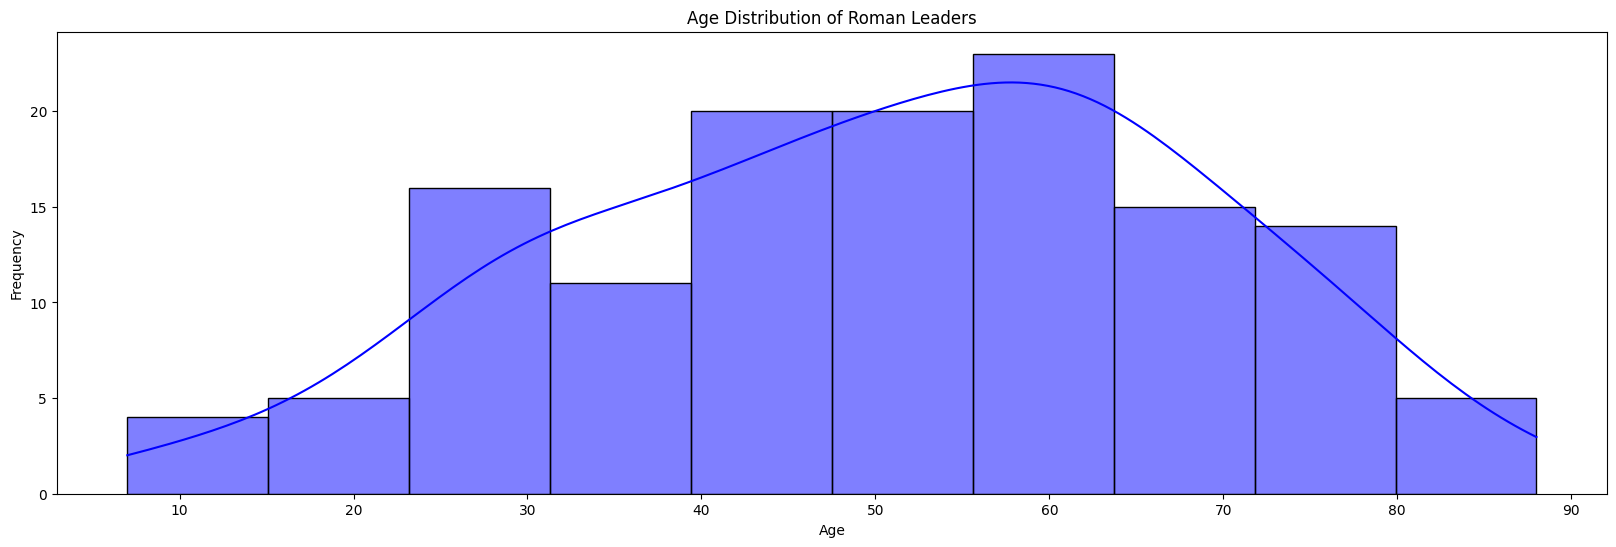

In [37]:
plt.figure(figsize=(20, 6))
sns.histplot(df["Age"], kde=True, bins=10, color="blue")
plt.title("Age Distribution of Roman Leaders")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()


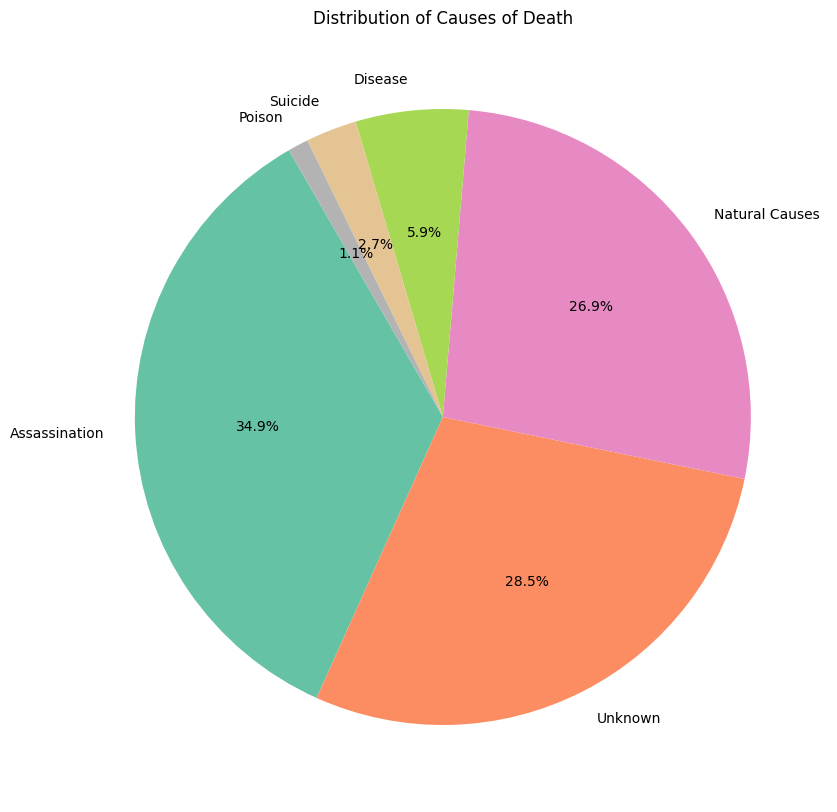

In [30]:
cause_counts = df["Cause"].value_counts()
plt.figure(figsize=(10,10))
cause_counts.plot.pie(autopct="%1.1f%%", startangle=120, cmap="Set2")
plt.title("Distribution of Causes of Death")
plt.ylabel("")
plt.show()
